In [25]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
df = pd.read_csv("nykaa_products.csv")

In [27]:
df.head()

,Name,Price,URL,Image,normal,dry,oily,sensitive,combination
0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,750,https://www.nykaa.com/neutrogena-hydro-boost-w...,https://images-static.nykaa.com/media/catalog/...,1,1,1,1,1
1,CeraVe Moisturizer For Dry Skin with Ceramides...,359,https://www.nykaa.com/cerave-moisturizing-crea...,https://images-static.nykaa.com/media/catalog/...,1,1,0,0,0
2,SKIN1004 Madagascar Centella Tone Brightening ...,2249,https://www.nykaa.com/skin1004-madagascar-cent...,https://images-static.nykaa.com/media/catalog/...,1,0,0,1,1
3,O3+ D-Tan Professional Pack For De Tan,1411,https://www.nykaa.com/o3-d-tan-pack-300gm/p/20...,https://images-static.nykaa.com/media/catalog/...,1,0,0,0,0
4,PLIX 2% Salicylic Acid Jamun Active Acne Contr...,474,https://www.nykaa.com/plix-jamun-active-acne-c...,https://images-static.nykaa.com/media/catalog/...,1,1,1,1,1


In [28]:
def clean_text(text):
    text = text.lower() 
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # Remove special characters
    text = re.sub(r'\b(for|with|the|and|to|of|in|by|on|a|an)\b', '', text)  # Remove common words
    return text.strip()

In [29]:
df["Cleaned_Name"] = df["Name"].apply(clean_text)

In [30]:
df["Brand"] = df["Cleaned_Name"].apply(lambda x: x.split()[0])
print(df[["Name", "Brand"]].head())

                                                Name       Brand
0  Neutrogena Hydro Boost Hyaluronic Acid Water G...  neutrogena
1  CeraVe Moisturizer For Dry Skin with Ceramides...      cerave
2  SKIN1004 Madagascar Centella Tone Brightening ...    skin1004
3             O3+ D-Tan Professional Pack For De Tan          o3
4  PLIX 2% Salicylic Acid Jamun Active Acne Contr...        plix


In [31]:
#converting the cleaned names into numerical features
vectorizer = TfidfVectorizer(stop_words="english", max_features=30)
tfidf_matrix = vectorizer.fit_transform(df["Cleaned_Name"])

In [32]:
#convert to dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df

,50,acid,acne,body,brightening,cleanser,combo,cream,day,face,...,pa,plum,serum,skin,spf,sunscreen,toner,vitamin,wash,water
0,0.0,0.440625,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.307272,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.508344
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.481929,0.0,0.0,0.00000,0.0,0.0,0.000000
2,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000
3,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000
4,0.0,0.561946,0.637663,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.52688,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.00000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000
1370,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.75339,0.0,0.0,0.000000
1371,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.587287,0.468862,0.659745,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000
1372,0.0,0.000000,0.000000,0.0,0.0,0.790497,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.612466,0.0,0.0,0.00000,0.0,0.0,0.000000


In [33]:
df = pd.concat([df, tfidf_df], axis=1)
df.to_csv("processed_nykaa_products.csv", index=False)

In [34]:
df.head()

,Name,Price,URL,Image,normal,dry,oily,sensitive,combination,Cleaned_Name,...,pa,plum,serum,skin,spf,sunscreen,toner,vitamin,wash,water
0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,750,https://www.nykaa.com/neutrogena-hydro-boost-w...,https://images-static.nykaa.com/media/catalog/...,1,1,1,1,1,neutrogena hydro boost hyaluronic acid water g...,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.508344
1,CeraVe Moisturizer For Dry Skin with Ceramides...,359,https://www.nykaa.com/cerave-moisturizing-crea...,https://images-static.nykaa.com/media/catalog/...,1,1,0,0,0,cerave moisturizer dry skin ceramides niacin...,...,0.0,0.0,0.00000,0.481929,0.0,0.0,0.0,0.0,0.0,0.000000
2,SKIN1004 Madagascar Centella Tone Brightening ...,2249,https://www.nykaa.com/skin1004-madagascar-cent...,https://images-static.nykaa.com/media/catalog/...,1,0,0,1,1,skin1004 madagascar centella tone brightening ...,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,O3+ D-Tan Professional Pack For De Tan,1411,https://www.nykaa.com/o3-d-tan-pack-300gm/p/20...,https://images-static.nykaa.com/media/catalog/...,1,0,0,0,0,o3 dtan professional pack de tan,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,PLIX 2% Salicylic Acid Jamun Active Acne Contr...,474,https://www.nykaa.com/plix-jamun-active-acne-c...,https://images-static.nykaa.com/media/catalog/...,1,1,1,1,1,plix 2 salicylic acid jamun active acne contro...,...,0.0,0.0,0.52688,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [35]:
df.columns[11:]

Index(['50', 'acid', 'acne', 'body', 'brightening', 'cleanser', 'combo',
       'cream', 'day', 'face', 'facial', 'gel', 'glow', 'hyaluronic', 'lotion',
       'mask', 'moisturizer', 'niacinamide', 'night', 'oil', 'pa', 'plum',
       'serum', 'skin', 'spf', 'sunscreen', 'toner', 'vitamin', 'wash',
       'water'],
      dtype='object')

In [12]:
#cosine similarity for content based filtering

from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between products based on TF-IDF features
tfidf_features = df.iloc[:, 11:]  # Columns after 'Brand' (TF-IDF keywords)
cosine_sim = cosine_similarity(tfidf_features)

# Convert to DataFrame for easy lookup
cosine_sim_df = pd.DataFrame(cosine_sim, index=df["Cleaned_Name"], columns=df["Cleaned_Name"])

# Display sample similarity scores
print(cosine_sim_df.iloc[:5, :5])

Cleaned_Name                                        neutrogena hydro boost hyaluronic acid water gel light face  \
Cleaned_Name                                                                                                      
neutrogena hydro boost hyaluronic acid water ge...                                           1.000000             
cerave moisturizer  dry skin  ceramides niacina...                                           0.000000             
skin1004 madagascar centella tone brightening c...                                           0.000000             
o3 dtan professional pack  de tan                                                            0.000000             
plix 2 salicylic acid jamun active acne control...                                           0.247608             

Cleaned_Name                                        cerave moisturizer  dry skin  ceramides niacinamide  \
Cleaned_Name                                                                           

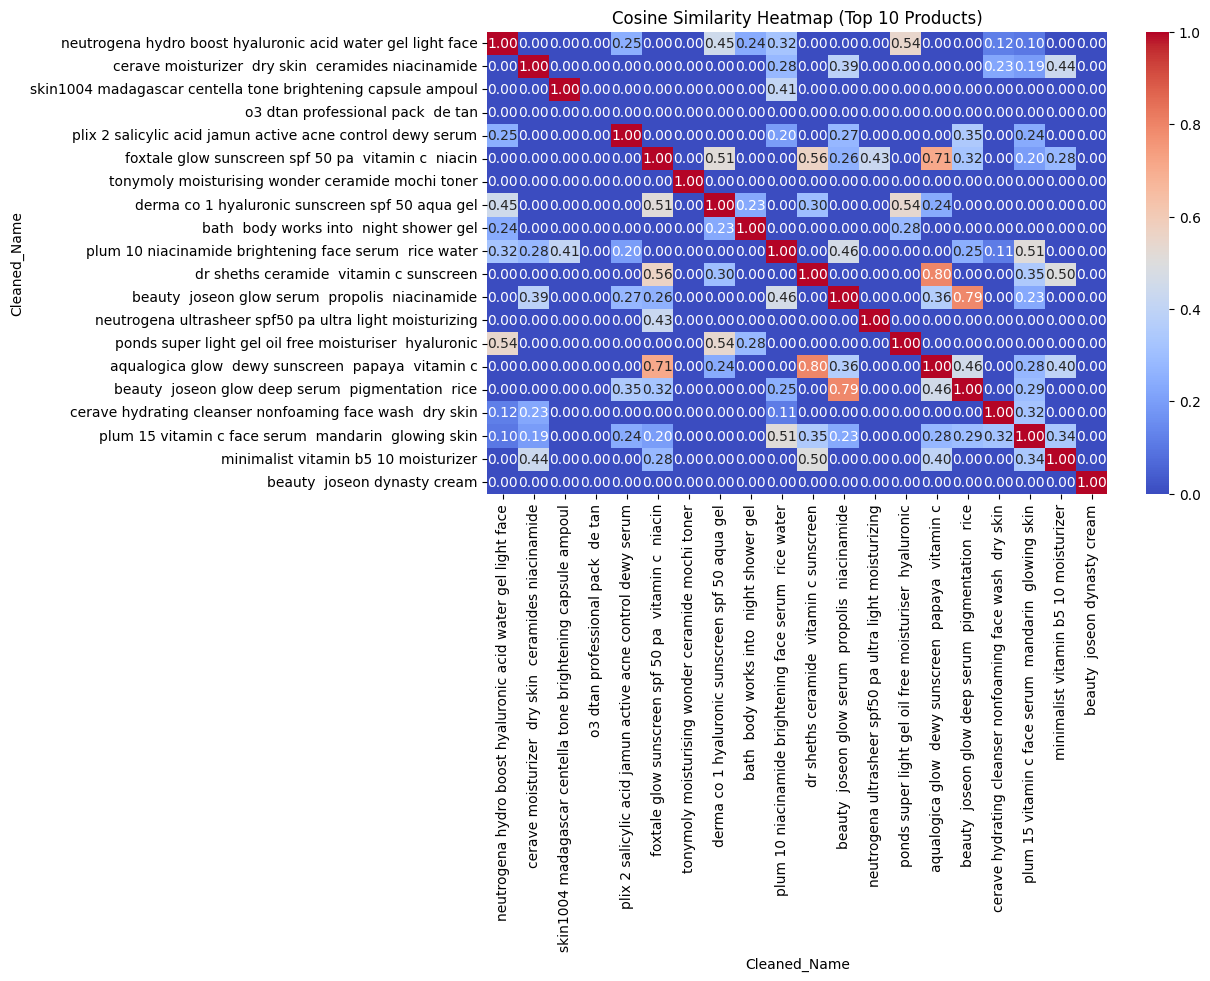

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of top 10 products
plt.figure(figsize=(10, 6))
sns.heatmap(cosine_sim_df.iloc[:20, :20], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cosine Similarity Heatmap (Top 10 Products)")
plt.show()

In [14]:
def recommend_products(product_name, df, cosine_sim_df, top_n=5):
    # Find the corresponding cleaned name
    product_row = df[df["Name"] == product_name]

    if product_row.empty:
        return "Product not found in dataset."

    cleaned_name = product_row["Cleaned_Name"].values[0]

    # Get index of the cleaned product name
    idx = df[df["Cleaned_Name"] == cleaned_name].index[0]

    # Get similarity scores for this product and sort them
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N most similar products (excluding itself)
    top_indices = [i[0] for i in sim_scores[1:top_n+1]]

    # Return recommended products
    return df.iloc[top_indices][["Name", "Price", "URL", "Image"]]


In [15]:
recommend_products("Dr. Sheth's Haldi & Hyaluronic Acid Sunscreen", df, cosine_sim, top_n=5)

,Name,Price,URL,Image
180,Re'equil Ceramide & Hyaluronic Acid Moisturise...,266,https://www.nykaa.com/re-equil-ceramide-hyalur...,NaN
354,"Deconstruct Hyaluronic Acid Lip Balm, Lip Balm...",193,https://www.nykaa.com/deconstruct-hyaluronic-a...,https://images-static.nykaa.com/media/catalog/...
578,Dot & Key AM PM Routine With Hyaluronic Acid- ...,952,https://www.nykaa.com/dot-key-am-pm-routine/p/...,NaN
1116,Uriage Bariederm-Cica Daily Gel-Cream With Hya...,1920,https://www.nykaa.com/uriage-bariederm-cica-da...,https://images-static.nykaa.com/media/catalog/...
1263,Deconstruct Hyaluronic Acid Hydrating Facewash...,269,https://www.nykaa.com/deconstruct-hyaluronic-a...,NaN


In [16]:
#step 2: filtering based on user skin type, brands they dont like and price range

unique_brands = df['Brand'].unique()
print("Available Brands:", unique_brands)

Available Brands: ['neutrogena' 'cerave' 'skin1004' 'o3' 'plix' 'foxtale' 'tonymoly' 'derma'
 'bath' 'plum' 'dr' 'beauty' 'ponds' 'aqualogica' 'minimalist' 'face'
 'nivea' 'nykaa' 'wishcare' 'chemist' 'dyou' 'vaseline' 'deconstruct'
 'sanfe' 'o3professional' 'pineapple' 'kiehls' 'be' 'neutriderm' 'dhc'
 'dot' 'pixi' 'sunscoop' 'vilvah' 'dove' 'physiogel' 'body' 'gush' 'wow'
 'forest' 'mac' 'mcaffeine' 'lotus' 'elf' 'fixderma' 'bronson' 'quench'
 'pilgrim' 'laneige' 'hiphop' 'loreal' 'within' 'cetaphil' 'lakme'
 'bioderma' 'reequil' 'simple' 'aveeno' 'episoft' 'loccitane' 'ordinary'
 'parachute' 'la' 'lacto' 'innisfree' 'dermatouch' 'avene' 'inde'
 'garnier' 'aminu' 'mamaearth' 'vlcc' 'novology' 'elizabeth' 'bie' 'indus'
 'biodermanight' 'himalaya' 'ozone' 'isntree' 'tac' 'estee' 'clinique'
 'nat' 'drjart' 'earth' 'kaya' 'moody' 'mars' 'nutriglow' 'getmecraft'
 'personal' 'tulips' 'dermavive' 'jovees' 'caudalie' 'pink' 'charmis'
 'gabit' 'pac' 'fcl' 'aroma' 'ras' 'dermalogica' 'priveda'

In [18]:
def filter_brands(df):
    unique_brands = sorted(df['Brand'].unique())  # Get unique brands and sort them
    print("Available brands:", unique_brands)
    
    # Ask user for brands to remove
    remove_brands = input("Enter brand names to remove, separated by commas: ").split(',')
    remove_brands = [brand.strip().lower() for brand in remove_brands]  # Clean input
    
    # Filter dataset
    filtered_df = df[~df['Brand'].str.lower().isin(remove_brands)]
    print(f"Removed {len(df) - len(filtered_df)} products from selected brands.")
    
    return filtered_df

In [19]:
def filter_skin_type_and_price(df):
    # Step 1: Skin Type Filtering
    available_skin_types = ['normal', 'dry', 'oily', 'sensitive', 'combination']
    print("Available skin types:", available_skin_types)
    selected_skin_types = input("Enter your skin type(s) (comma-separated): ").split(',')
    selected_skin_types = [skin.strip().lower() for skin in selected_skin_types]
    skin_filtered_df = df[df[selected_skin_types].sum(axis=1) > 0]  

    # Step 2: Price Filtering
    min_price = int(input("Enter minimum price: ₹"))
    max_price = int(input("Enter maximum price: ₹"))
    price_filtered_df = skin_filtered_df[(skin_filtered_df['Price'] >= min_price) & (skin_filtered_df['Price'] <= max_price)]
    
    print(f"Products after filtering: {len(price_filtered_df)}")
    
    return price_filtered_df


In [22]:
#adding weights to skin type to avoid completely letting go of products
skin_type_matrix = df[['normal', 'dry', 'oily', 'sensitive', 'combination']].values
skin_type_similarity = cosine_similarity(skin_type_matrix)
#Apply Weighting to Existing Similarity Scores
alpha = 0.5  # Weight for text-based similarity
beta = 0.5   # Weight for skin type similarity
weighted_similarity = (alpha * cosine_sim) + (beta * skin_type_similarity)


In [23]:
def get_weighted_recommendations(product_name, top_n=5):
    if product_name not in df['Name'].values:
        print("Product not found!")
        return []
    
    # Get index of the selected product
    idx = df[df['Name'] == product_name].index[0]
    
    # Get similarity scores and sort them
    sim_scores = list(enumerate(weighted_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top similar products
    top_indices = [i[0] for i in sim_scores[1:top_n+1]]  # Exclude itself
    
    # Return recommended products
    return df.iloc[top_indices][['Name', 'Price', 'URL']]

In [24]:
recommended_products = get_weighted_recommendations("Beauty Of Joseon Glow Serum - Propolis + Niacinamide")
print(recommended_products)

                                                  Name  Price  \
15   Beauty Of Joseon Glow Deep Serum For Pigmentat...   1120   
975  Lotus Botanicals Carrot & Niacinamide Glow and...    387   
425  O3+ Snail 98 Mucin Serum With Niacinamide For ...    956   
168  Within Beauty Ceramide & Niacinamide Serum, Ca...    639   
64   Foxtale Nourishing Moisturiser With Niacinamid...    308   

                                                   URL  
15   https://www.nykaa.com/beauty-of-joseon-glow-de...  
975  https://www.nykaa.com/lotus-botanicals-carrot-...  
425  https://www.nykaa.com/o3-professional-snail-mu...  
168  https://www.nykaa.com/within-beauty-calming-dr...  
64   https://www.nykaa.com/foxtale-nourishing-moist...  
